In [21]:
# Import required libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the datasets
train_data = pd.read_csv('data/churn-bigml-80.csv')  # Replace with your actual path
validation_data = pd.read_csv('data/churn-bigml-20.csv')  # Replace with your actual path

# Preprocess the training data
def preprocess_data(data):
    # Encode categorical features
    label_encoder = LabelEncoder()
    data['State'] = label_encoder.fit_transform(data['State'])
    data['International plan'] = data['International plan'].apply(lambda x: 1 if x == 'Yes' else 0)
    data['Voice mail plan'] = data['Voice mail plan'].apply(lambda x: 1 if x == 'Yes' else 0)

    # Encode the target variable
    data['Churn'] = label_encoder.fit_transform(data['Churn'])

    # Scale numerical features
    scaler = StandardScaler()
    numerical_features = ['Account length', 'Total day minutes', 'Total eve minutes', 
                          'Total night minutes', 'Total intl minutes', 'Total day calls', 
                          'Total eve calls', 'Total night calls', 'Total intl calls', 
                          'Total day charge', 'Total eve charge', 'Total night charge', 
                          'Total intl charge', 'Customer service calls']
    data[numerical_features] = scaler.fit_transform(data[numerical_features])

    return data

# Apply preprocessing
train_data = preprocess_data(train_data)
validation_data = preprocess_data(validation_data)

# Display the first few rows
train_data.head()


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,0.692163,415,0,1,25,1.579670,0.484868,1.579942,-0.058619,-0.050781,-0.058445,0.857403,-0.469031,0.856707,-0.085020,-0.597527,-0.085681,-0.429172,0
1,35,0.161278,415,0,1,26,-0.329918,1.135375,-0.330194,-0.095916,0.147654,-0.095397,1.048458,0.149054,1.049293,1.242179,-0.597527,1.242921,-0.429172,0
2,31,0.919686,415,0,0,0,1.179302,0.685024,1.179465,-1.554439,0.494917,-1.554963,-0.759668,0.200561,-0.758391,0.704125,0.216894,0.698194,-1.191955,0
3,35,-0.420168,408,1,0,0,2.212509,-1.466653,2.212675,-2.718509,-0.596479,-2.718922,-0.084083,-0.572045,-0.084339,-1.304609,1.031314,-1.307995,0.333610,0
4,36,-0.647691,415,1,0,0,-0.235822,0.634985,-0.235772,-1.022461,1.090224,-1.021482,-0.281046,1.076181,-0.281303,-0.049150,-0.597527,-0.045823,1.096392,0


Step 2: Exploratory Data Analysis (EDA) and Visualization


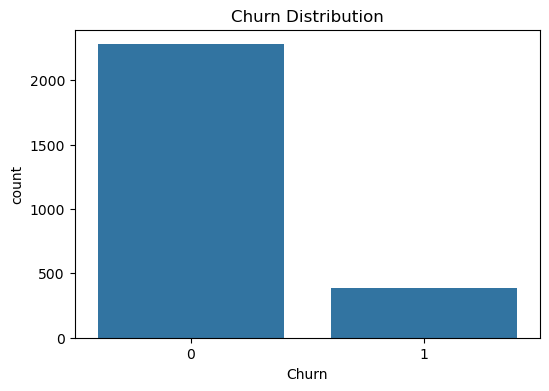

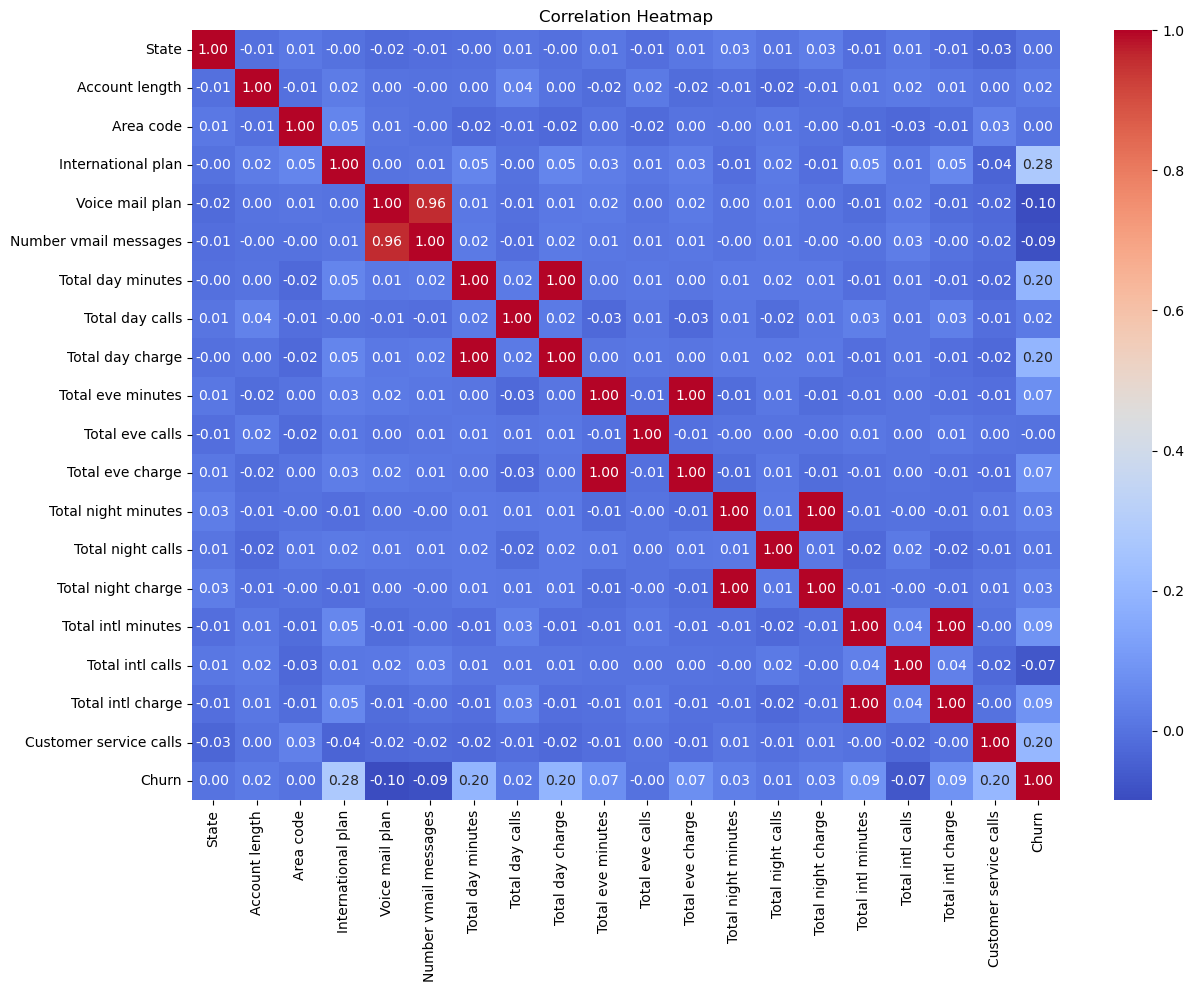

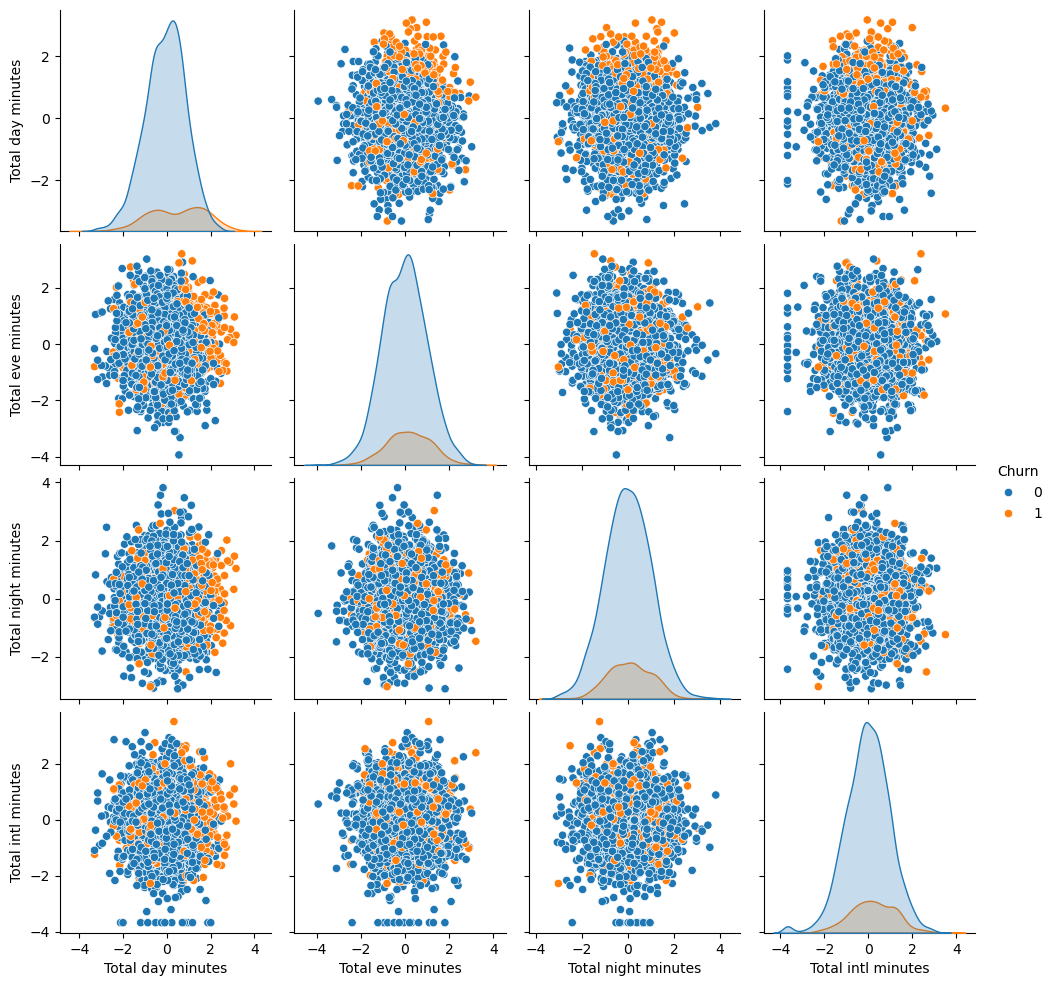

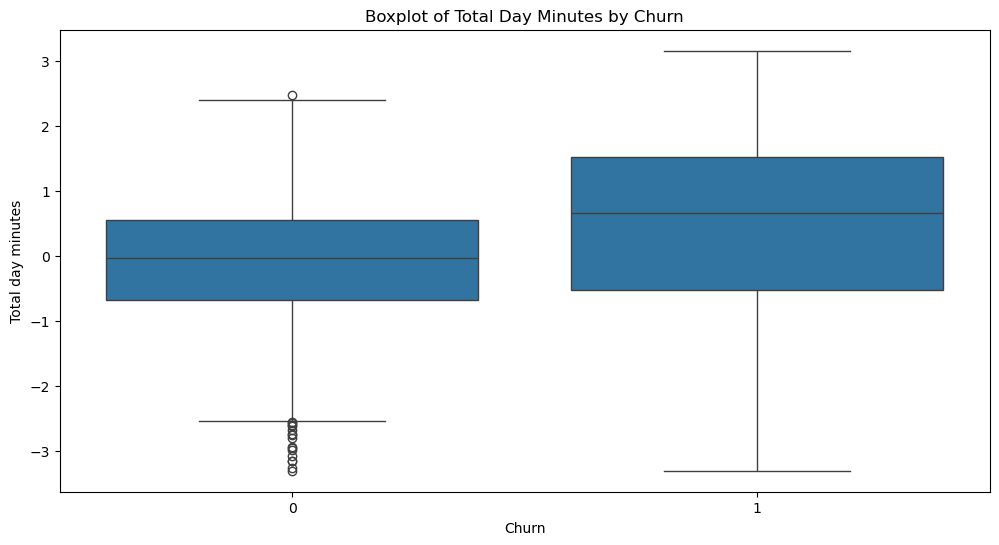

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Perform EDA and Visualization
# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=train_data)
plt.title('Churn Distribution')
plt.show()

# Correlation heatmap - Ensuring all features are numerical now
plt.figure(figsize=(14, 10))
sns.heatmap(train_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot for selected features
sns.pairplot(train_data[['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes', 'Churn']], hue='Churn')
plt.show()

# Boxplot of numerical features by churn
plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn', y='Total day minutes', data=train_data)
plt.title('Boxplot of Total Day Minutes by Churn')
plt.show()


In [26]:
# Step 3: Feature Selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

def select_features(data):
    # Prepare features and target
    X = data.drop('Churn', axis=1)
    y = data['Churn']

    # Feature selection using RandomForest
    model = RandomForestClassifier(random_state=42)
    model.fit(X, y)

    # Select important features
    sel = SelectFromModel(model, prefit=True)
    selected_features = X.columns[(sel.get_support())]

    return selected_features.tolist()

# Call the function to select features
selected_features = select_features(train_data)
print("Selected Features:", selected_features)



Selected Features: ['International plan', 'Total day minutes', 'Total day charge', 'Total eve minutes', 'Total eve charge', 'Customer service calls']


In [28]:
##Step 4: Split Data into Train and Test Sets
from sklearn.model_selection import train_test_split

# Using selected features for training
X = train_data[selected_features]
y = train_data['Churn']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [30]:
# Step 5: Handle Class Imbalance
from imblearn.over_sampling import SMOTE

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


Step 6: Train Basic Models and Evaluate Performance with ROC Curves

C:\Users\Himanshu\AppData\Local\Temp\ipykernel_3336\4057183400.py:44: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', lw=2, linestyle='--')  # Diagonal line


Model: Logistic Regression
Accuracy: 0.7603
ROC AUC: 0.7754
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.77      0.85       455
           1       0.35      0.70      0.46        79

    accuracy                           0.76       534
   macro avg       0.64      0.73      0.65       534
weighted avg       0.85      0.76      0.79       534



Model: Decision Tree
Accuracy: 0.8146
ROC AUC: 0.7500
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.84      0.89       455
           1       0.42      0.66      0.51        79

    accuracy                           0.81       534
   macro avg       0.68      0.75      0.70       534
weighted avg       0.86      0.81      0.83       534



Model: Random Forest
Accuracy: 0.8408
ROC AUC: 0.8636
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       

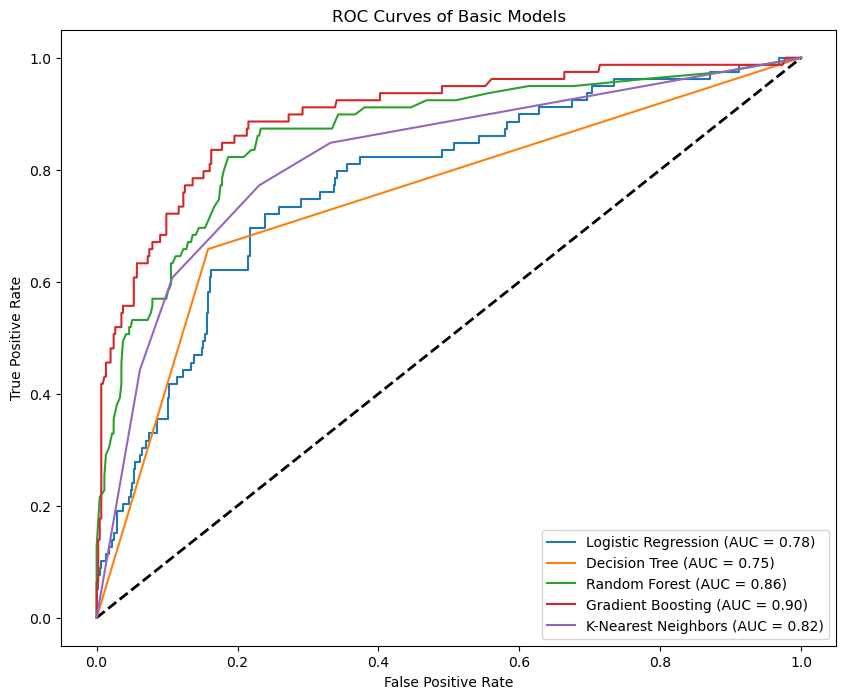

Baseline Model Accuracies:
Logistic Regression: 0.7603
Decision Tree: 0.8146
Random Forest: 0.8408
Gradient Boosting: 0.8483
K-Nearest Neighbors: 0.8127


In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Define a function to train, evaluate a model, and plot ROC curve
def train_evaluate_plot_roc(model, model_name, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n")
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    
    return accuracy  # Return accuracy to store in the dictionary

# Initialize basic models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Evaluate each model and plot ROC
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--', lw=2, linestyle='--')  # Diagonal line
plt.title('ROC Curves of Basic Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

baseline_accuracies = {}
for model_name, model in models.items():
    accuracy = train_evaluate_plot_roc(model, model_name, X_train_res, y_train_res, X_test, y_test)
    baseline_accuracies[model_name] = accuracy

plt.legend(loc='lower right')
plt.show()

# Display baseline performance of all models
print("Baseline Model Accuracies:")
for model_name, accuracy in baseline_accuracies.items():
    print(f"{model_name}: {accuracy:.4f}")


In [108]:
# Display baseline performance of all models
print("Baseline Model Accuracies:")
for model_name, accuracy in baseline_accuracies.items():
    print(f"{model_name}: {accuracy:.4f}")


Baseline Model Accuracies:
Logistic Regression: 0.7603
Decision Tree: 0.8146
Random Forest: 0.8408
Gradient Boosting: 0.8483
K-Nearest Neighbors: 0.8127


Step 8: Hyperparameter Tuning for XGBoost

In [110]:
from sklearn.model_selection import GridSearchCV

# Example of tuning Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Initialize Random Forest with random state
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_rf.fit(X_train_res, y_train_res)

# Retrieve the best model and its parameters
best_rf = grid_search_rf.best_estimator_
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)


Best Parameters for Random Forest: {'max_depth': 7, 'min_samples_split': 10, 'n_estimators': 100}


Step 9: Evaluate the Tuned Random forest Model

In [113]:
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Evaluate the tuned Random Forest model on the training set
y_train_pred = best_rf.predict(X_train_res)
y_train_prob = best_rf.predict_proba(X_train_res)[:, 1]
train_accuracy = accuracy_score(y_train_res, y_train_pred)
train_roc_auc = roc_auc_score(y_train_res, y_train_prob)
print("Training Accuracy:", train_accuracy)
print("Training Classification Report:\n", classification_report(y_train_res, y_train_pred))


Training Accuracy: 0.8869994514536478
Training Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      1823
           1       0.91      0.86      0.88      1823

    accuracy                           0.89      3646
   macro avg       0.89      0.89      0.89      3646
weighted avg       0.89      0.89      0.89      3646



In [115]:
# Evaluate the tuned Random Forest model on the test set
y_test_pred = best_rf.predict(X_test)
y_test_prob = best_rf.predict_proba(X_test)[:, 1]
test_accuracy = accuracy_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_prob)
print("\nTest Accuracy:", test_accuracy)
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))


Test Accuracy: 0.850187265917603
Test Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.86      0.91       455
           1       0.50      0.78      0.61        79

    accuracy                           0.85       534
   macro avg       0.73      0.82      0.76       534
weighted avg       0.89      0.85      0.86       534



In [117]:
# Evaluate the tuned Random Forest model on the validation set
X_validation = validation_data[selected_features]
y_validation = validation_data['Churn']
y_validation_pred = best_rf.predict(X_validation)
y_validation_prob = best_rf.predict_proba(X_validation)[:, 1]
validation_accuracy = accuracy_score(y_validation, y_validation_pred)
validation_roc_auc = roc_auc_score(y_validation, y_validation_prob)
print("\nValidation Accuracy:", validation_accuracy)
print("Validation Classification Report:\n", classification_report(y_validation, y_validation_pred))



Validation Accuracy: 0.8800599700149925
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93       572
           1       0.55      0.81      0.66        95

    accuracy                           0.88       667
   macro avg       0.76      0.85      0.79       667
weighted avg       0.91      0.88      0.89       667



Step 10: Visualize Performance of the Tuned Model

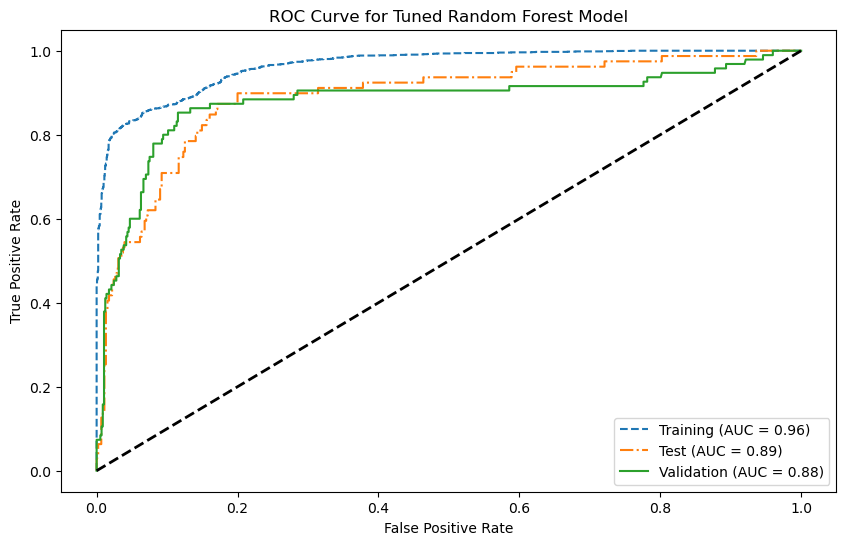

In [119]:
# Plot ROC Curve for the tuned Random Forest model
plt.figure(figsize=(10, 6))
fpr_train, tpr_train, _ = roc_curve(y_train_res, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
fpr_val, tpr_val, _ = roc_curve(y_validation, y_validation_prob)

plt.plot(fpr_train, tpr_train, label=f'Training (AUC = {train_roc_auc:.2f})', linestyle='--')
plt.plot(fpr_test, tpr_test, label=f'Test (AUC = {test_roc_auc:.2f})', linestyle='-.')
plt.plot(fpr_val, tpr_val, label=f'Validation (AUC = {validation_roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Tuned Random Forest Model')
plt.legend(loc='lower right')
plt.show()

Step-by-Step Code to Check for Overfitting

1. Compare Training and Validation Performance

In [121]:
# Compare Training, Test, and Validation performance
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Validation Accuracy:", validation_accuracy)

# Quick summary of differences
accuracy_diff_train_test = train_accuracy - test_accuracy
accuracy_diff_train_val = train_accuracy - validation_accuracy

print(f"Difference in Training and Test Accuracy: {accuracy_diff_train_test:.4f}")
print(f"Difference in Training and Validation Accuracy: {accuracy_diff_train_val:.4f}")


Training Accuracy: 0.8869994514536478
Test Accuracy: 0.850187265917603
Validation Accuracy: 0.8800599700149925
Difference in Training and Test Accuracy: 0.0368
Difference in Training and Validation Accuracy: 0.0069


2. Plot Learning Curves

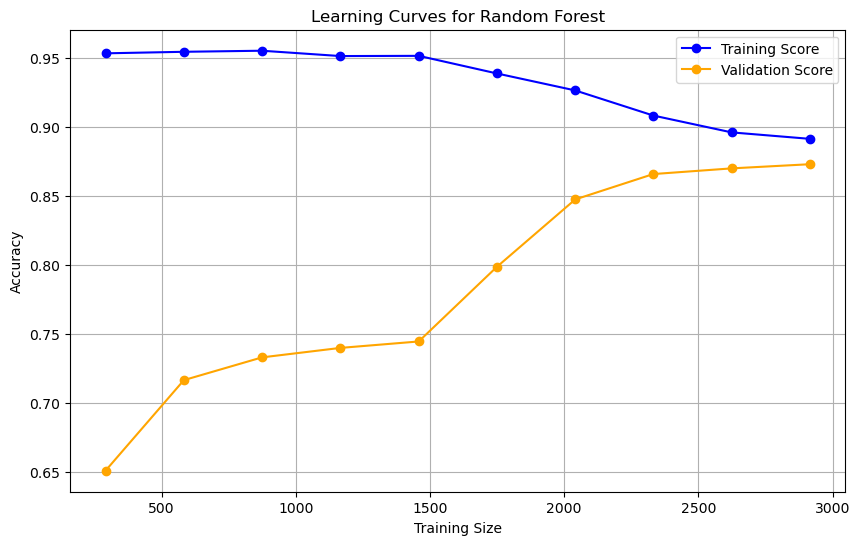

In [123]:
from sklearn.model_selection import learning_curve
import numpy as np

def plot_learning_curves(model, X, y):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Score')
    plt.plot(train_sizes, val_scores_mean, 'o-', color='orange', label='Validation Score')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.title('Learning Curves for Random Forest')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Plot learning curves for the tuned Random Forest model
plot_learning_curves(best_rf, X_train_res, y_train_res)


 Use Cross-Validation to Check Model Stability

Step 2: Retrain the Best Model with Early Stopping

In [125]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation to see how well the model generalizes
cv_scores = cross_val_score(best_rf, X_train_res, y_train_res, cv=5, scoring='accuracy')

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation of CV Score: {np.std(cv_scores):.4f}")


Cross-Validation Scores: [0.87534247 0.87517147 0.84773663 0.90397805 0.86419753]
Mean CV Score: 0.8733
Standard Deviation of CV Score: 0.0184


Feature Importance to Explain Predictability

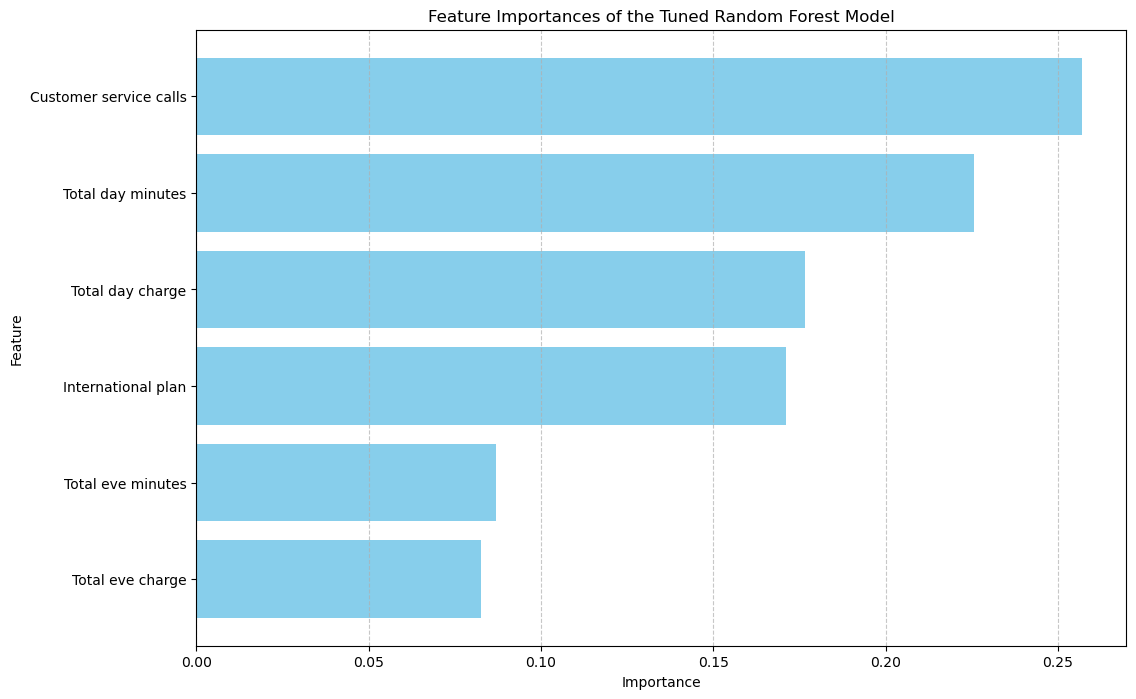

In [128]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the best Random Forest model
feature_importances = best_rf.feature_importances_

# Create a DataFrame to hold feature names and their importance scores
features = X_train_res.columns  # Assuming X_train_res is a DataFrame or has column names
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.title('Feature Importances of the Tuned Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
